In [80]:
import numpy as np
import pandas as pd
import sklearn 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from pandas.plotting import scatter_matrix

In [58]:
import folium
print('Folium installed and imported!')
from folium.plugins import HeatMap

Folium installed and imported!


In [98]:
df_housing = pd.read_csv('//Users//omniaelmenshawy//Desktop///housing2.csv')

In [19]:
df_housing.head(10)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,gender
0,-122.23,37.88,41.0,880,129.0,322.0,126,8.3252,452600,NEAR BAY,male
1,-122.22,37.86,21.0,7099,1106.0,2401.0,1138,8.3014,358500,NEAR BAY,female
2,-122.24,37.85,52.0,1467,190.0,496.0,177,7.2574,352100,NEAR BAY,male
3,-122.25,37.85,52.0,1274,235.0,558.0,219,5.6431,341300,NEAR BAY,female
4,-122.25,37.85,NaN,1627,280.0,NaN,259,3.8462,342200,NEAR BAY,male
5,-122.25,37.85,NaN,919,213.0,NaN,193,4.0368,269700,NEAR BAY,female
6,-122.25,37.84,NaN,2535,NaN,NaN,514,3.6591,299200,NEAR BAY,male
7,-122.25,37.84,NaN,3104,NaN,NaN,NaN,3.1200,241400,NEAR BAY,female
8,-122.26,37.84,42.0,2555,NaN,NaN,NaN,2.0804,226700,NEAR BAY,male
9,-122.25,37.84,52.0,3549,NaN,NaN,NaN,3.6912,261100,NEAR BAY,female


In [16]:
print(df_housing.shape)

(20640, 11)


## The goal of the analysis is to understand how price varies in California housing depending pn some factors:

In [21]:
df_housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20382 non-null  float64
 3   total_rooms         20640 non-null  int64  
 4   total_bedrooms      15758 non-null  float64
 5   population          20596 non-null  float64
 6   households          19335 non-null  object 
 7   median_income       17873 non-null  float64
 8   median_house_value  20640 non-null  int64  
 9   ocean_proximity     20640 non-null  object 
 10  gender              16620 non-null  object 
dtypes: float64(6), int64(2), object(3)
memory usage: 1.7+ MB


In [20]:
df_housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,median_income,median_house_value
count,20640.000000,20640.000000,20382.000000,20640.000000,15758.000000,20596.000000,17873.000000,20640.000000
mean,-119.569704,35.631861,28.676283,2635.763081,539.920104,1424.928724,3.939403,206855.816909
std,2.003532,2.135952,12.589284,2181.615252,419.834171,1132.237768,1.943517,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,2.598600,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,3.587100,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,652.000000,1725.000000,4.830400,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6210.000000,35682.000000,15.000100,500001.000000


### manipulating the missing values:

In [23]:
missing_values = df_housing.isnull().sum()
print(missing_values)

longitude                0
latitude                 0
housing_median_age     258
total_rooms              0
total_bedrooms        4882
population              44
households            1305
median_income         2767
median_house_value       0
ocean_proximity          0
gender                4020
dtype: int64


In [25]:
#sample of the missing values:
df_housing[df_housing.isnull().any(axis=1)]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,gender
4,-122.25,37.85,NaN,1627,280.0,NaN,259,3.8462,342200,NEAR BAY,male
5,-122.25,37.85,NaN,919,213.0,NaN,193,4.0368,269700,NEAR BAY,female
6,-122.25,37.84,NaN,2535,NaN,NaN,514,3.6591,299200,NEAR BAY,male
7,-122.25,37.84,NaN,3104,NaN,NaN,NaN,3.1200,241400,NEAR BAY,female
8,-122.26,37.84,42.0,2555,NaN,NaN,NaN,2.0804,226700,NEAR BAY,male
...,...,...,...,...,...,...,...,...,...,...,...
20627,-121.32,39.13,NaN,358,NaN,169.0,NaN,3.0000,162500,INLAND,female
20628,-121.48,39.10,NaN,2043,NaN,1018.0,NaN,2.5952,92400,INLAND,male
20629,-121.39,39.12,NaN,10035,NaN,6912.0,NaN,2.0943,108300,INLAND,female
20630,-121.32,39.29,NaN,2640,NaN,1257.0,NaN,3.5673,112000,INLAND,male


Text(0.5, 0, 'Total bedrooms')

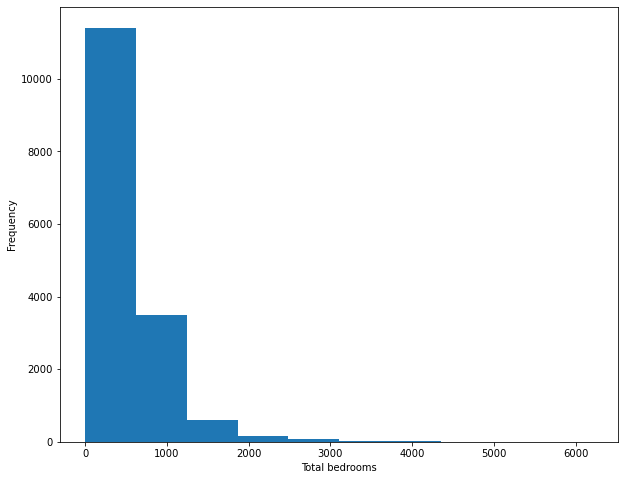

In [29]:
#most houses have bedrooms between 0 to 1000.
#houses with more than 1000 room are rare.
plt.figure(figsize=(10,8))
df_housing['total_bedrooms'].plot(kind='hist')
plt.xlabel('Total bedrooms')

In [35]:
df_housing.loc[df_housing['total_bedrooms'].isna(),'total_bedrooms']=df_housing['total_bedrooms'].mean()
df_housing

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,gender
0,-122.23,37.88,41.0,880,129.0,322.0,126,8.3252,452600,NEAR BAY,male
1,-122.22,37.86,21.0,7099,1106.0,2401.0,1138,8.3014,358500,NEAR BAY,female
2,-122.24,37.85,52.0,1467,190.0,496.0,177,7.2574,352100,NEAR BAY,male
3,-122.25,37.85,52.0,1274,235.0,558.0,219,5.6431,341300,NEAR BAY,female
4,-122.25,37.85,NaN,1627,280.0,NaN,259,3.8462,342200,NEAR BAY,male
...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665,374.0,845.0,330,1.5603,78100,INLAND,female
20636,-121.21,39.49,18.0,697,150.0,356.0,114,2.5568,77100,INLAND,male
20637,-121.22,39.43,17.0,2254,485.0,1007.0,433,1.7000,92300,INLAND,female
20638,-121.32,39.43,18.0,1860,409.0,741.0,349,1.8672,84700,INLAND,male


In [36]:
df_housing.isna().sum()

longitude                0
latitude                 0
housing_median_age     258
total_rooms              0
total_bedrooms           0
population              44
households            1305
median_income         2767
median_house_value       0
ocean_proximity          0
gender                4020
dtype: int64

In [37]:
housing_filled= df_housing.fillna(3)
housing_filled.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
gender                0
dtype: int64

Text(0.5, 0, 'Total bedrooms')

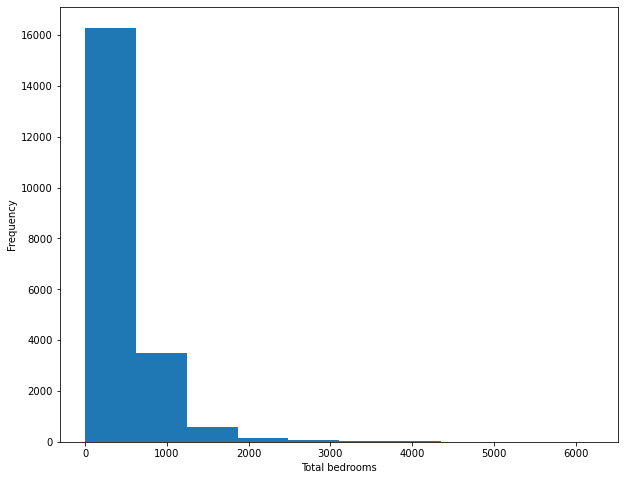

In [39]:
plt.figure(figsize=(10,8))
housing_filled['total_bedrooms'].plot(kind='hist')
plt.xlabel('Total bedrooms')

### house ages:
- 25% of the houses are < 18 years median age
- 50% of the houses are < 29 years median age
- 75% of the houses  are < 37 years median age
so we conclude that most of the houses have median ages more than 18 years.

In [42]:
housing_filled.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.355329,2635.763081,539.920104,1421.897481,3.813466,206855.816909
std,2.003532,2.135952,12.831490,2181.615252,366.834544,1132.930093,1.836656,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,338.000000,784.000000,2.741250,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,539.920104,1164.000000,3.262050,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,566.000000,1723.000000,4.583300,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6210.000000,35682.000000,15.000100,500001.000000


## plotting the data:

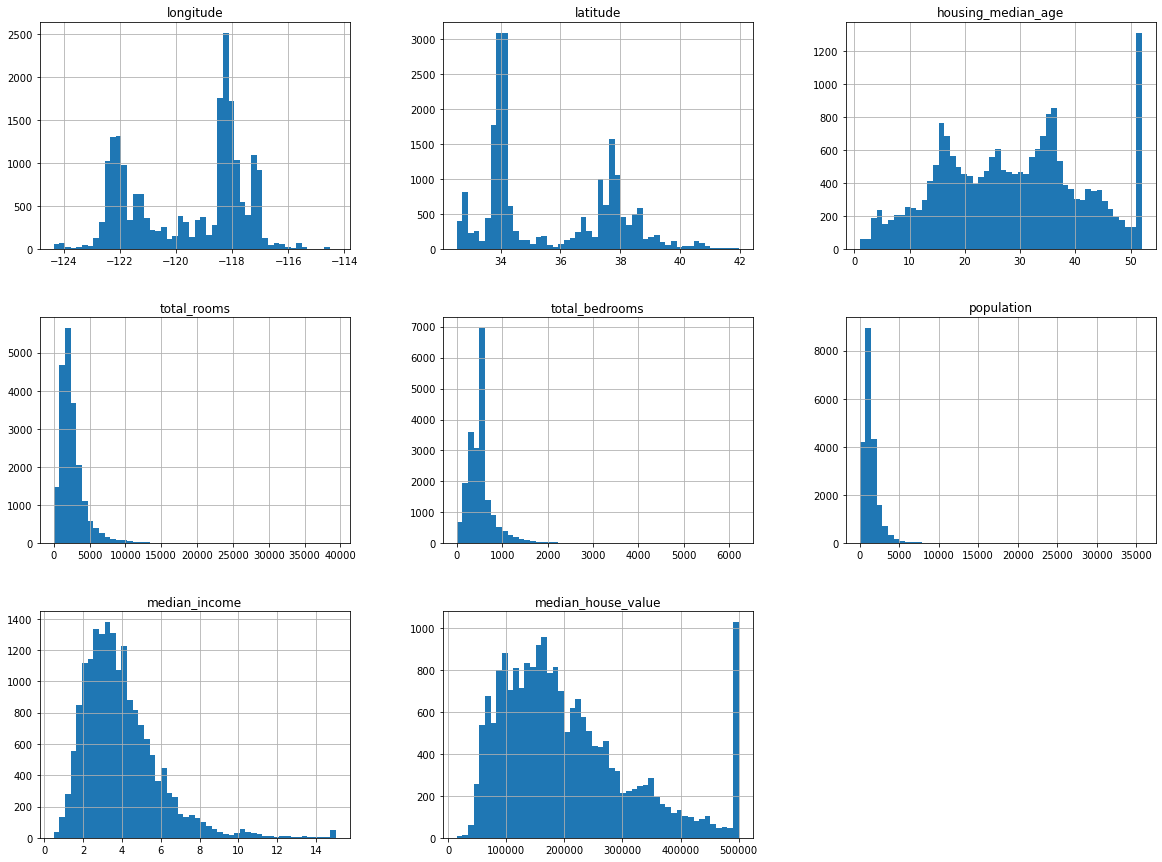

In [43]:
df_housing.hist(bins=50, figsize=(20,15))
plt.show()

#### maximum price is 500001 dollars

In [64]:
print("House statistics:\n")
print(df_housing['median_house_value'].describe())

House statistics:

count     20640.000000
mean     206855.816909
std      115395.615874
min       14999.000000
25%      119600.000000
50%      179700.000000
75%      264725.000000
max      500001.000000
Name: median_house_value, dtype: float64


In [47]:
print(df_housing.nunique())

longitude               844
latitude                862
housing_median_age       52
total_rooms            5926
total_bedrooms         1823
population             3884
households             1703
median_income         11576
median_house_value     3842
ocean_proximity           5
gender                    2
dtype: int64


### correlation matrix showes that:
- the median house value is positivily correlated with the median income and has a great impact
- while it is negatively correlated with the:
 - latitude: the value decreases when we go north
 - longitude: the value also decreases when we go west
 - population: the value decreases when the total number of people living in the block increases

In [78]:
corr_matrix = df_housing.corr()
corr_matrix["median_house_value"].sort_values(ascending = False)

median_house_value    1.000000
median_income         0.688625
total_rooms           0.134153
housing_median_age    0.107378
total_bedrooms        0.044949
population           -0.024385
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64

### Using folium package to show real heatmap on a real map:

In [61]:
cal_map = folium.Map(location=[36.7783,-119.4179], zoom_start = 6, min_zoom=5)
df_map = df_housing[['latitude', 'longitude']]
data = [[row['latitude'],row['longitude']] for index, row in df_map.iterrows()]
_ = HeatMap(data, radius=10).add_to(cal_map)
cal_map

#### shape of price distribution by the latitude and longitude:
- high-density areas are:
 * the Bay Area
 * around Los Angeles and San Diego
 * plus a long line of fairly high density in the Central Valley, around Sacramento and Fresno.

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

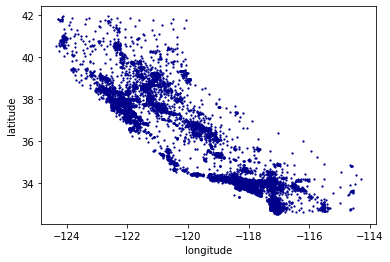

In [73]:
df_housing.plot.scatter(x='longitude',y='latitude',c='DarkBlue',s=1.5)

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

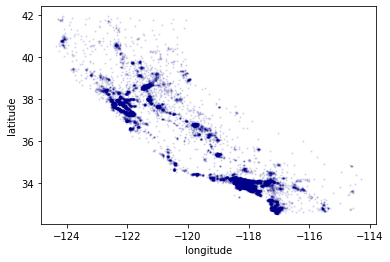

In [74]:
df_housing.plot.scatter(x="longitude", y="latitude",c='DarkBlue', s=1.5, alpha=0.1)

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

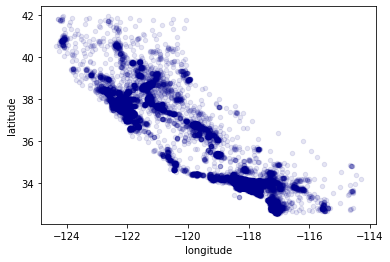

In [75]:
df_housing.plot.scatter(x="longitude", y="latitude",c='DarkBlue', alpha=0.1)

In [63]:
df_housing.head(1)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,gender
0,-122.23,37.88,41.0,880,129.0,322.0,126,8.3252,452600,NEAR BAY,male


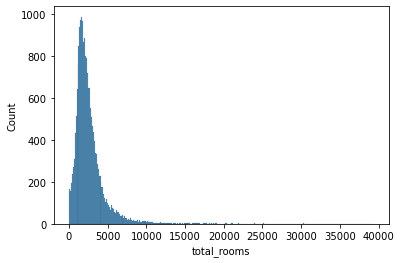

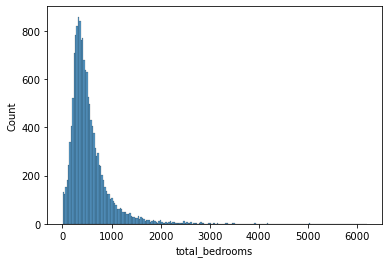

In [68]:
Columns_Needed = ['total_rooms','total_bedrooms'] 
for col in Columns_Needed:
    sns.histplot(df[col]) 
    plt.show()

### relation between area and prices:
- red areas are the most high in price which are near the sea

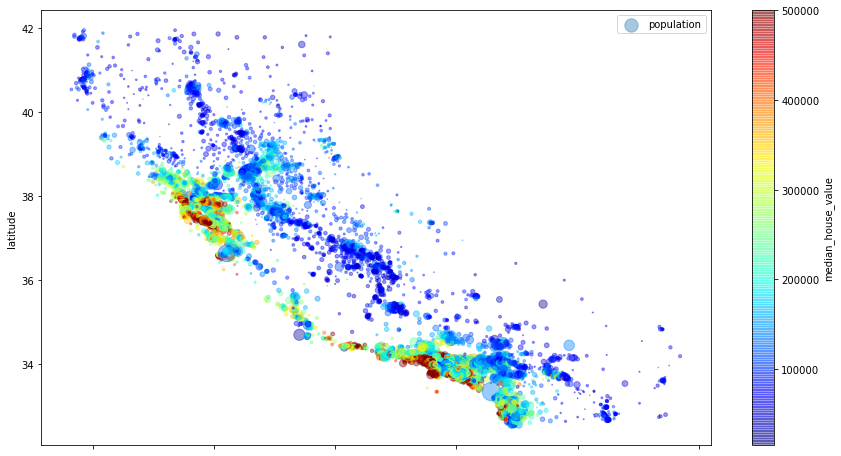

In [76]:
df_housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
 s=df_housing["population"]/100, label="population", figsize=(15,8),
 c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True,
)
plt.legend()

array([[<AxesSubplot:xlabel='median_house_value', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='median_income', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='median_house_value'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='median_income'>,
        <AxesSubplot:xlabel='median_income', ylabel='median_income'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='median_income'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='median_income'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='median_income', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='total_rooms'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='housing_median_age'>,
        <AxesSubplot:xlabel='median_incom

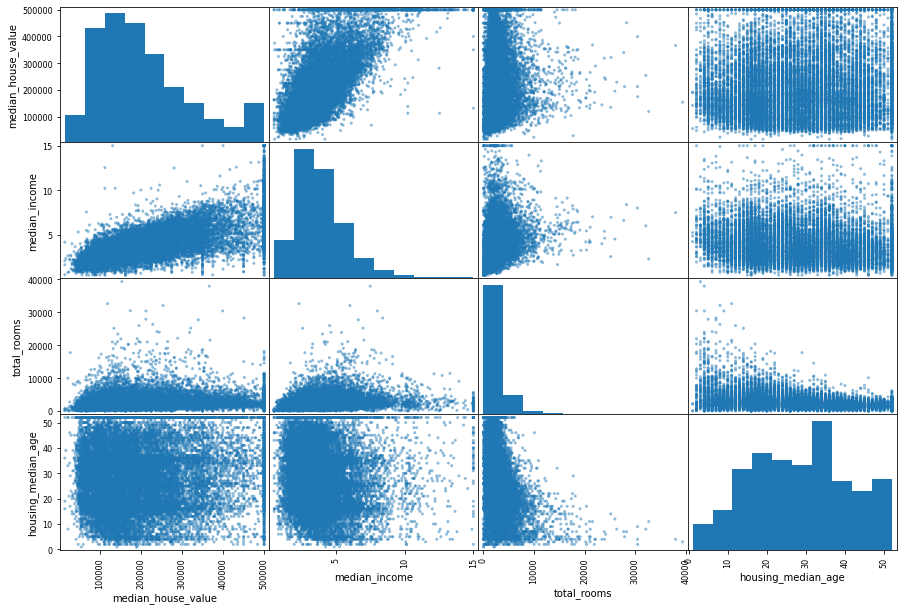

In [82]:
axis = ["median_house_value", "median_income", "total_rooms",
 "housing_median_age"]
scatter_matrix(df_housing[axis], figsize=(15, 10))

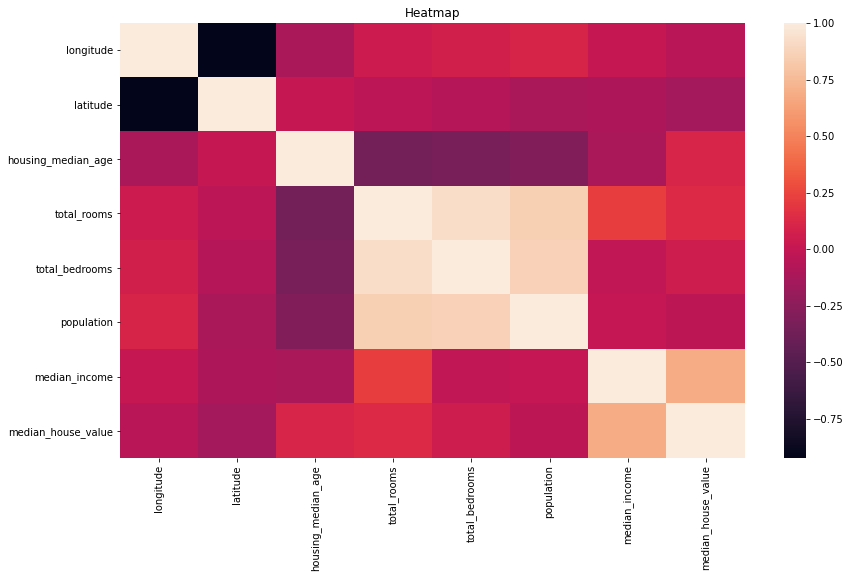

In [84]:
plt.figure(figsize=(14,8)) 
plt.title('Heatmap') 
sns.heatmap(df.corr()) 
plt.show()

In [85]:
df_housing.head(1)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,gender
0,-122.23,37.88,41.0,880,129.0,322.0,126,8.3252,452600,NEAR BAY,male


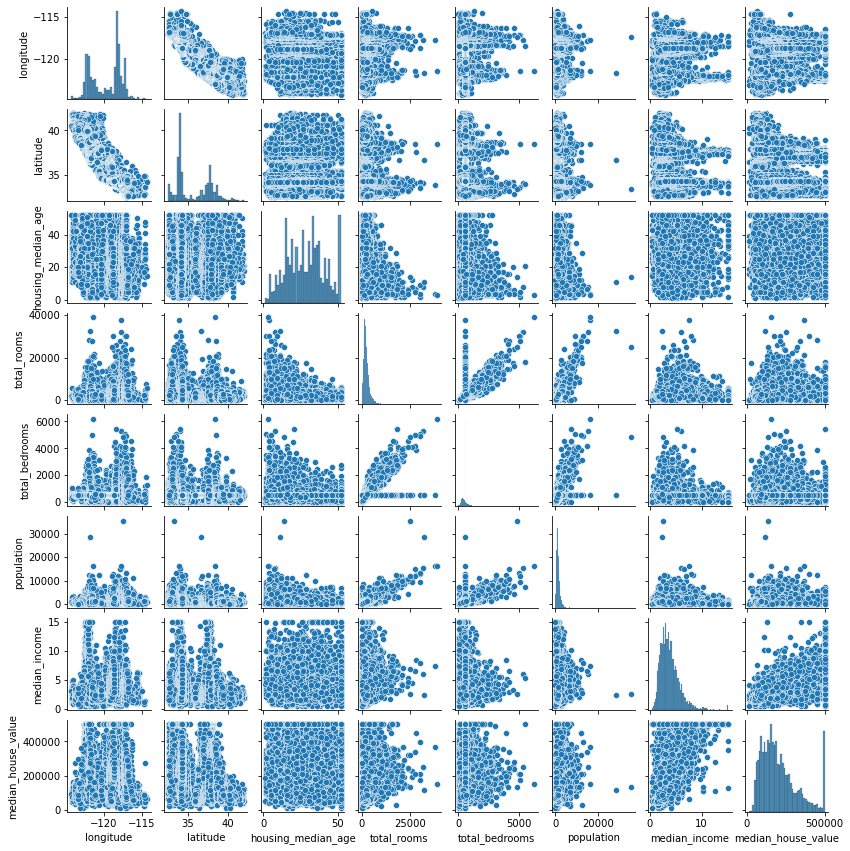

In [88]:
sns.pairplot(df_housing, height=1.5);
plt.show()

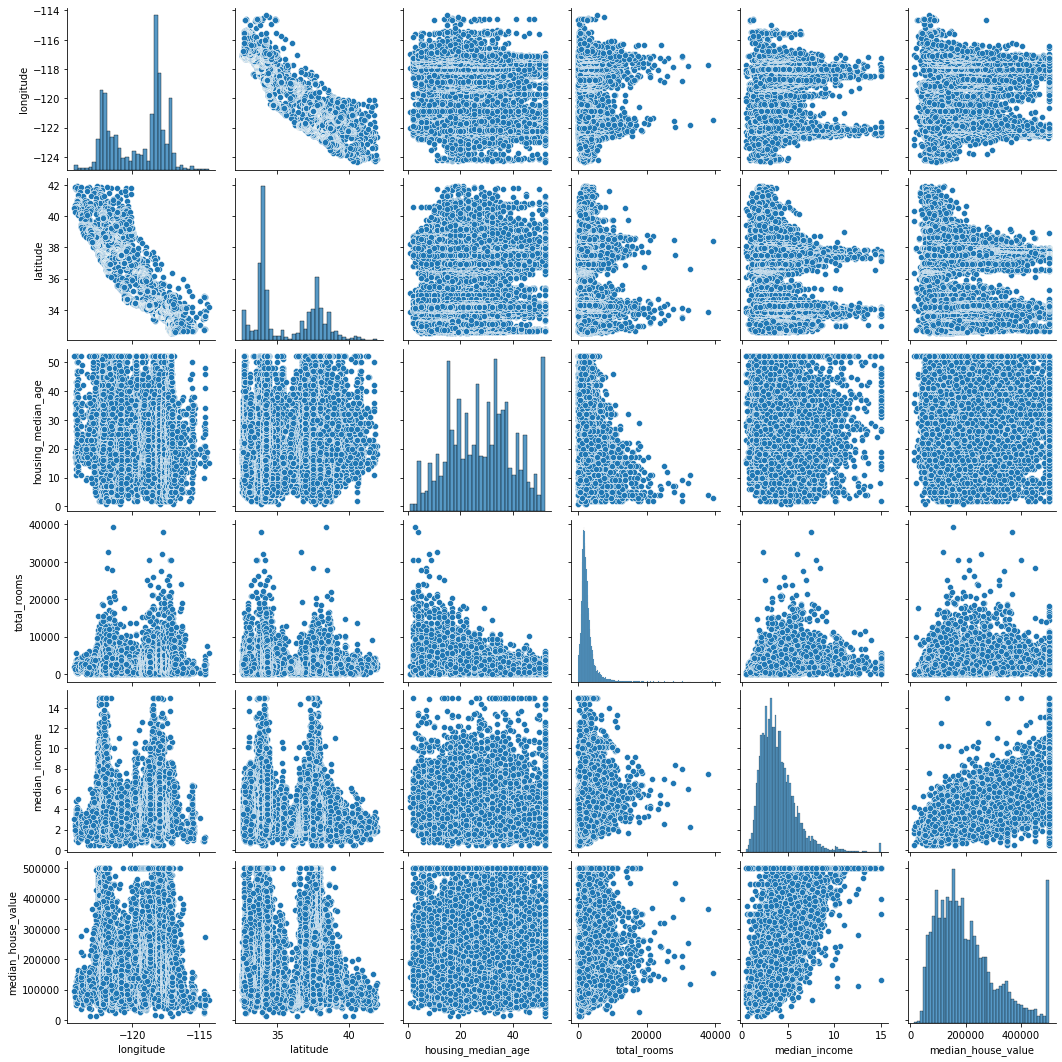

In [90]:

#The data that we want to study: 
column_study = ["longitude", "latitude", "housing_median_age", "total_rooms", "median_income", "median_house_value"]
sns.pairplot(df_housing[column_study], height = 2.5);
plt.show()

/Users/omniaelmenshawy/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='housing_median_age', ylabel='Density'>

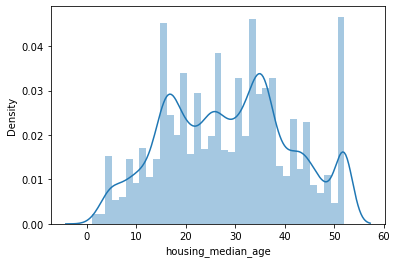

In [91]:
sns.distplot(df_housing["housing_median_age"])